In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
l = 0.5


def diffdrive(x, y, theta, v_l, v_r, t, l) :
    x_n, y_n, theta_n = x, y, theta
    
    n = 50
    dt = 1 / n
    num_steps = int(n * t)
    
    for i in range(num_steps):
        x_n += 0.5 * (v_l + v_r) * np.cos(theta_n) * dt
        y_n += 0.5 * (v_l + v_r) * np.sin(theta_n) * dt
        theta_n += (v_r - v_l) / l * dt
        
    return x_n, y_n, theta_n


T = 1
R = 1

v = 2*np.pi*R / T
w = v / R

v_l = w * (R - 0.5 * l)
v_r = w * (R + 0.5 * l)

res = diffdrive(0, 0, np.pi/2, v_l, v_r, T, l)
assert res[0] < 1e-10 and res[1] < 1e-10 and abs(2.5*np.pi - res[2]) < 1e-10

In [3]:
x0 = np.array([1.5, 2, np.pi/2]).reshape(-1, 1)
x0

array([[1.5       ],
       [2.        ],
       [1.57079633]])

In [4]:
c1 = np.array([0.3, 0.3, 3]).reshape(-1, 1)
c2 = np.array([0.1, -0.1, 1]).reshape(-1, 1)
c3 = np.array([0.2, 0.0, 2]).reshape(-1, 1)

In [5]:
poses = [x0]

for c in (c1, c2, c3):
    x, y, theta = poses[-1].flatten()
    v_l, v_r, t = c.flatten()
    x_n, y_n, theta_n = diffdrive(x, y, theta, v_l, v_r, t, l)
    poses.append(np.array([x_n, y_n, theta_n]).reshape(-1, 1))

poses

[array([[1.5       ],
        [2.        ],
        [1.57079633]]),
 array([[1.5       ],
        [2.9       ],
        [1.57079633]]),
 array([[1.5       ],
        [2.9       ],
        [1.17079633]]),
 array([[1.63913244],
        [3.03621317],
        [0.37079633]])]

In [6]:
from scipy.spatial.transform import Rotation

def Rz(angle):
    return Rotation.from_euler('xyz', [0, 0, angle]).as_matrix()[:2, :2]

colors = ['b', 'g', 'r', 'orange']

def draw_arrow(pose, idx):
    x, y, theta = pose.flatten()
    arrow = 0.1 * np.array([1, 0]).reshape(-1, 1)
    R = Rz(theta)
    dx, dy = (R @ arrow).flatten()
    plt.arrow(x, y, dx, dy, head_width=0.01, head_length=0.04, fc=colors[i], ec=colors[i], label=f'pose_{i}')
    

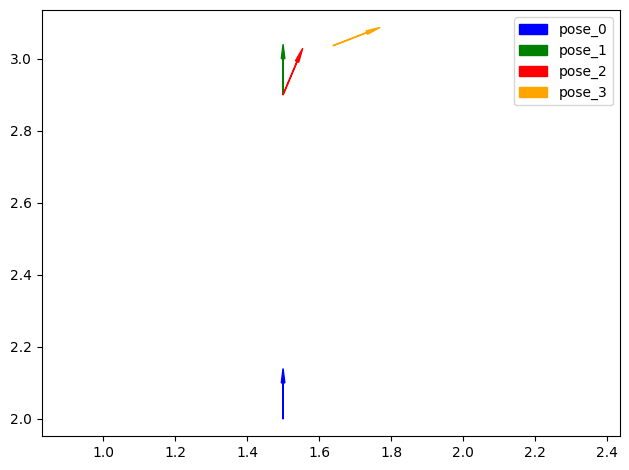

In [7]:
plt.axis('equal')

for i, pose in enumerate(poses):
    draw_arrow(pose, i)

plt.legend()
plt.tight_layout()
plt.show()